In [1]:
import pandas as pd
import numpy as np

# First Data Set 

Sources: 

https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid


Description: 

About Dataset
The heart attack datasets were collected at Zheen hospital in Erbil, Iraq, from January 2019 to May 2019. The attributes of this dataset are: age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, ck-mb and troponin with negative or positive output. According to the provided information, the medical dataset classifies either heart attack or none. The gender column in the data is normalized: the male is set to 1 and the female to 0. The glucose column is set to 1 if it is > 120; otherwise, 0. As for the output, positive is set to 1 and negative to 0.

Institutions
University of Kurdistan Hewler

Categories
Medicine, Heart Disease

DOI: Rashid, Tarik A.; Hassan, Bryar (2022), “Heart Attack Dataset”, Mendeley Data, V1, doi: 10.17632/wmhctcrt5v.1



# Step 1: Data Collection

In [2]:
# Load the dataset
df = pd.read_csv("Medicaldataset.csv")

# Step 2: Data Exploration

In [3]:
#first 5 rows
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
#describe the data 
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
#get the size of the data 
print(df.shape)

(1319, 9)


<AxesSubplot:>

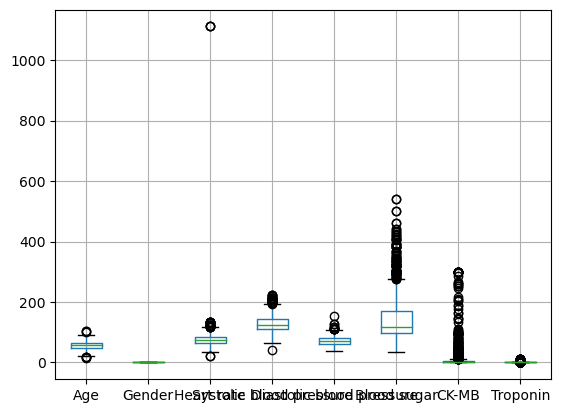

In [7]:
#get the outliers from uncleaned data
df.boxplot()

# Step 3: Data Cleaning

In [7]:
#Check for duplicates
df.duplicated().sum()

0

There is no duplicated rows 

In [8]:
#Check for missing values 
print(df.isnull().sum())

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [9]:
# Standardize column names, by removing spaces from each side and removing undersore and captial letters
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Remove rows with non-realistic physiological values like heaert rate over 1000
df = df[
    (df['heart_rate'] >= 30) & (df['heart_rate'] <= 220) &
    (df['systolic_blood_pressure'] >= 70) & (df['systolic_blood_pressure'] <= 200) &
    (df['diastolic_blood_pressure'] >= 40) & (df['diastolic_blood_pressure'] <= 120)
]


In [10]:
df.describe()

,age,gender,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,blood_sugar,ck-mb,troponin
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000
mean,56.213396,0.659657,76.161994,126.200156,71.888629,146.621262,15.059616,0.359841
std,13.559072,0.474009,15.121599,23.538091,13.388292,74.233406,45.728740,1.156311
min,14.000000,0.000000,36.000000,70.000000,40.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,61.750000,98.000000,1.667500,0.006000
50%,58.000000,1.000000,74.000000,124.000000,71.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,142.000000,80.000000,170.000000,5.812500,0.083500
max,103.000000,1.000000,135.000000,200.000000,110.000000,541.000000,300.000000,10.300000


In [11]:
df.isnull().sum()

age                         0
gender                      0
heart_rate                  0
systolic_blood_pressure     0
diastolic_blood_pressure    0
blood_sugar                 0
ck-mb                       0
troponin                    0
result                      0
dtype: int64

# 4. Feature Transformation and Engineering

In [12]:
# 1. Create age groups
# Categorizing ages helps reveal patterns by life stage
df['age_group'] = pd.cut(df['age'],
                                bins=[0, 30, 45, 60, 75, 100],
                                labels=['<30', '30-45', '46-60', '61-75', '75+'])

# 2. Create blood pressure status to understand for non medical people
# Clinical categories are more meaningful than raw numbers
df['bp_status'] = pd.cut(df['systolic_blood_pressure'],
                                bins=[0, 90, 120, 140, 160, 200],
                                labels=['Low', 'Normal', 'Elevated', 'High', 'Very High'])

# 3. Flag abnormal levels
# These are clinically significant thresholds
df['high_troponin'] = (df['troponin'] > 0.1).astype(int)
df['high_ckmb'] = (df['ck-mb'] > 5).astype(int)

# 4. Create pulse pressure 
# Difference between systolic and diastolic BP
df['pulse_pressure'] = df['systolic_blood_pressure'] - df['diastolic_blood_pressure']

In [13]:
df

,age,gender,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,blood_sugar,ck-mb,troponin,result,age_group,bp_status,high_troponin,high_ckmb,pulse_pressure
0,64,1,66,160,83,160.0,1.80,0.012,negative,61-75,High,0,0,77
1,21,1,94,98,46,296.0,6.75,1.060,positive,<30,Normal,1,1,52
2,55,1,64,160,77,270.0,1.99,0.003,negative,46-60,High,0,0,83
3,64,1,70,120,55,270.0,13.87,0.122,positive,61-75,Normal,1,1,65
4,55,1,64,112,65,300.0,1.08,0.003,negative,46-60,Normal,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,30-45,Elevated,0,0,55
1315,66,1,84,125,55,149.0,1.33,0.172,positive,61-75,Elevated,1,0,70
1316,45,1,85,168,104,96.0,1.24,4.250,positive,30-45,Very High,1,0,64
1317,54,1,58,117,68,443.0,5.80,0.359,positive,46-60,Normal,1,1,49


In [14]:
df.to_csv("cleaned_and_transformed_medical_data.csv")

الأعمدة الأصلية
age (العمر)

العمر بالميلادي للمريض (بالسنوات)

gender (الجنس)

يمثل جنس المريض (0 أو 1)

0 = أنثى 

1 = ذكر 

heart_rate (معدل ضربات القلب)

عدد ضربات القلب في الدقيقة 

مثال: 66 يعني أن معدل ضربات القلب 66 ضربة/دقيقة

systolic_blood_pressure (ضغط الدم الانقباضي)

الضغط عند انقباض القلب (الرقم الأعلى في قياس الضغط)

مثال: 160 يعني ضغط دم انقباضي = 160 ملم زئبق

diastolic_blood_pressure (ضغط الدم الانبساطي)

الضغط عند انبساط القلب (الرقم الأدنى في قياس الضغط)

مثال: 83 يعني ضغط دم انبساطي = 83 ملم زئبق

blood_sugar (سكر الدم)

مستوى الجلوكوز في الدم (ملغم/ديسيلتر)

مثال: 160.0 يعني أن مستوى السكر في الدم = 160 ملغم/ديسيلتر

ck-mb (إنزيم CK-MB)

مستوى إنزيم كرياتين  (علامة على تلف عضلة القلب)

مثال: 1.8 يعني أن مستوى الإنزيم = 1.8 وحدة/لتر

troponin (تروبونين)

بروتين يفرز عند إصابة عضلة القلب (علامة مهمة للنوبة القلبية)

مثال: 0.012 يعني أن مستوى التروبونين = 0.012 نانوغرام/مل

result (النتيجة)

تشخيص المريض (إيجابي/سلبي)

negative = لا يوجد احتشاء قلبي (سلبي)

positive = احتشاء قلبي (إيجابي)


# New Features and their meaning


age_group (فئة العمر)

تقسيم المرضى إلى فئات عمرية:

<30 = أقل من 30 سنة

30-45 = بين 30 و45 سنة

46-60 = بين 46 و60 سنة

61-75 = بين 61 و75 سنة

75+ = أكبر من 75 سنة

bp_status (حالة ضغط الدم)

تصنيف ضغط الدم حسب المعايير الطبية:

Low (منخفض) = أقل من 90

Normal (طبيعي) = بين 90 و120

Elevated (مرتفع قليلًا) = بين 120 و140

High (مرتفع) = بين 140 و160

Very High (مرتفع جدًا) = أكثر من 160

high_troponin (تروبونين مرتفع)

1 إذا كان التروبونين > 0.1 (مؤشر خطر)

0 إذا كان طبيعيًا

high_ckmb (إنزيم CK-MB مرتفع)

1 إذا كان CK-MB > 5 (مؤشر على تلف القلب)

0 إذا كان طبيعيًا

pulse_pressure (فرق الضغط النبضي)

الفرق بين الضغط الانقباضي والانبساطي.

مثال: إذا كان systolic=160 وdiastolic=83، فإن pulse_pressure = 160 - 83 = 77.

يساعد في تقييم صحة الأوعية الدموية.

# Summary 

The data cleaning and transformation process involved several key steps to ensure the dataset was accurate and ready for analysis. First, column names were standardized by removing spaces and converting them to lowercase for consistency. Next, unrealistic physiological values, such as extreme heart rates or blood pressure readings, were filtered out to maintain data integrity. New features were then engineered, including age groups, blood pressure status categories, and binary flags for elevated biomarkers like troponin and CK-MB, which help identify potential heart issues. Additionally, pulse pressure was calculated as the difference between systolic and diastolic blood pressure to provide further clinical insights. Finally, the cleaned and enhanced dataset was saved to a new CSV file, making it suitable for further exploration and modeling.